## IMPORTING PACKAGES

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os 
import preprocessing
import visualization
import librosa
from copy import deepcopy as dc

## DATA PROCESSING

In [25]:
signal_16zt = ['8h_16zt_2023_2_10-ch2','8h_16zt_2023_2_10-ch3','8h_16zt_2023_2_10-ch4',
               '8h_16zt_2023_2_10-ch5','8h_16zt_2023_2_10-ch6','8h_16zt_2023_2_10-ch7',
               '8h_16zt_2023_2_11-ch2','8h_16zt_2023_2_11-ch4','8h_16zt_2023_2_11-ch5','8h_16zt_2023_2_11-ch7',
               '8hr_16zt_2022_10_04-ch2','8hr_16zt_2022_10_04-ch3','8hr_16zt_2022_10_04-ch4','8hr_16zt_2022_10_04-ch5',
               '8hr_16zt_2022_10_04-ch6','8hr_16zt_2022_10_04-ch7','8hr_16zt_2022_10_04-ch8',
               '8hr_16zt_2022_10-10-ch1','8hr_16zt_2022_10-10-ch2','8hr_16zt_2022_10-10-ch4','8hr_16zt_2022_10-10-ch5','8hr_16zt_2022_10-10-ch8'
            ]

analysis_16zt = ['8h_16zt_2023_2_10-ch2_.ANA','8h_16zt_2023_2_10-ch3_.ANA','8h_16zt_2023_2_10-ch4_.ANA',
                 '8h_16zt_2023_2_10-ch5_.ANA','8h_16zt_2023_2_10-ch6_.ANA','8h_16zt_2023_2_10-ch7_.ANA',
                 '8h_16zt_2023_2_11-ch2_.ANA','8h_16zt_2023_2_11-ch4_.ANA','8h_16zt_2023_2_11-ch5_.ANA','8h_16zt_2023_2_11-ch7_.ANA',
                 '16zt_2022_10_04-ch2_.ANA','16zt_2022_10_04-ch3_.ANA','16zt_2022_10_04-ch4_.ANA','16zt_2022_10_04-ch5_.ANA',
                 '16zt_2022_10_04-ch6_.ANA','16zt_2022_10_04-ch7_.ANA','16zt_2022_10_04-ch8_.ANA',
                 '16zt_2022_10-10-ch1_.ANA','16zt_2022_10-10-ch2_.ANA','16zt_2022_10-10-ch4_.ANA','16zt_2022_10-10-ch5_.ANA','16zt_2022_10-10-ch8_.ANA'
                ]  


signal_8zt = ['8h_8zt_2023_2_07-ch1','8h_8zt_2023_2_07-ch2','8h_8zt_2023_2_07-ch3','8h_8zt_2023_2_07-ch4','8h_8zt_2023_2_07-ch6','8h_8zt_2023_2_07-ch8',
              '8hour_8zt_2022-10-08-ch2','8hour_8zt_2022-10-08-ch4','8hour_8zt_2022-10-08-ch6','8hour_8zt_2022-10-08-ch7',
              '8hr_8zt_10-18-2022-ch1','8hr_8zt_10-18-2022-ch3','8hr_8zt_10-18-2022-ch4','8hr_8zt_10-18-2022-ch5','8hr_8zt_10-18-2022-ch6',
              '8hr_8zt_2022_01_23-ch2','8hr_8zt_2022_01_23-ch3','8hr_8zt_2022_01_23-ch8',
              '8hr_8zt_2022_12_28-ch3','8hr_8zt_2022_12_28-ch4','8hr_8zt_2022_12_28-ch5','8hr_8zt_2022_12_28-ch8'
            ]

analysis_8zt = ['8h_8zt_2023_2_07-ch1_.ANA','8h_8zt_2023_2_07-ch2_.ANA','8h_8zt_2023_2_07-ch3_.ANA','8h_8zt_2023_2_07-ch4_.ANA','8h_8zt_2023_2_07-ch6_.ANA','8h_8zt_2023_2_07-ch8_.ANA',
                '8zt_2022-10-08-ch2_.ANA','8zt_2022-10-08-ch4_.ANA','8zt_2022-10-08-ch6_.ANA','8zt_2022-10-08-ch7_.ANA',
                '8zt_2022-10-18-ch1_.ANA','8zt_2022-10-18-ch3_.ANA','8zt_2022-10-18-ch4_.ANA','8zt_2022-10-18-ch5_.ANA','8zt_2022-10-18-ch6_.ANA',
                '8hr_8zt_2022_01_23-ch2_.ANA','8hr_8zt_2022_01_23-ch3_.ANA','8hr_8zt_2022_01_23-ch8_.ANA',
                '8hr_8zt_2022_12_28-ch3_.ANA','8hr_8zt_2022_12_28-ch4_.ANA','8hr_8zt_2022_12_28-ch5_.ANA','8hr_8zt_2022_12_28-ch8_.ANA'
                ]  

signal_0zt = ['8hr_0zt_2022-10-01-ch1','8hr_0zt_2022-10-01-ch3','8hr_0zt_2022-10-01-ch5','8hr_0zt_2022-10-01-ch6','8hr_0zt_2022-10-01-ch7','8hr_0zt_2022-10-01-ch8',
            '8hr_0zt_10-19-2022-ch1','8hr_0zt_10-19-2022-ch2','8hr_0zt_10-19-2022-ch3','8hr_0zt_10-19-2022-ch6','8hr_0zt_10-19-2022-ch8',
            '8h_0zt_2023_2_5-ch1','8h_0zt_2023_2_5-ch2','8h_0zt_2023_2_5-ch3','8h_0zt_2023_2_5-ch5','8h_0zt_2023_2_5-ch7','8h_0zt_2023_2_5-ch8',
            '8h_0zt_2023_2_6-ch1','8h_0zt_2023_2_6-ch2','8h_0zt_2023_2_6-ch3','8h_0zt_2023_2_6-ch4','8h_0zt_2023_2_6-ch5','8h_0zt_2023_2_6-ch6','8h_0zt_2023_2_6-ch8'
            ]

analysis_0zt = ['0zt_22-10-01-ch1_.ANA','0zt_22-10-01-ch3_.ANA','0zt_22-10-01-ch5_.ANA','0zt_22-10-01-ch6_.ANA','0zt_22-10-01-ch7_.ANA','0zt_22-10-01-ch8_.ANA',
                '0zt_22-10-19-ch1_.ANA','0zt_22-10-19-ch2_.ANA','0zt_22-10-19-ch3_.ANA','0zt_22-10-19-ch6_.ANA','0zt_22-10-19-ch8_.ANA',
                '0zt_2023_2_5-ch1_.ANA','0zt_2023_2_5-ch2_.ANA','0zt_2023_2_5-ch3_.ANA','0zt_2023_2_5-ch5_.ANA','0zt_2023_2_5-ch7_.ANA','0zt_2023_2_5-ch8_.ANA',
                '0zt_2023_2_6-ch1_.ANA','0zt_2023_2_6-ch2_.ANA','0zt_2023_2_6-ch3_.ANA','0zt_2023_2_6-ch4_.ANA','0zt_2023_2_6-ch5_.ANA','0zt_2023_2_6-ch6_.ANA','0zt_2023_2_6-ch8_.ANA'
                ]  

extension = ['.A01','.A02','.A03','.A04','.A05','.A06','.A07','.A08']

In [26]:
#Read train/test data
filename_test_16zt = ['8h_16zt_2023_2_10-ch4','8h_16zt_2023_2_11-ch7','8hr_16zt_2022_10_04-ch5','8hr_16zt_2022_10-10-ch8']
analysis_filename_test_16zt = ['8h_16zt_2023_2_10-ch4_.ANA','8h_16zt_2023_2_11-ch7_.ANA','16zt_2022_10_04-ch5_.ANA','16zt_2022_10-10-ch8_.ANA']
filename_16zt = dc(signal_16zt)
analysis_filename_16zt = dc(analysis_16zt)
for i in range(len(filename_test_16zt)):
    filename_16zt.remove(filename_test_16zt[i])
    analysis_filename_16zt.remove(analysis_filename_test_16zt[i])

filename_test_8zt = ['8h_8zt_2023_2_07-ch8','8hour_8zt_2022-10-08-ch7','8hr_8zt_10-18-2022-ch6','8hr_8zt_2022_01_23-ch8','8hr_8zt_2022_12_28-ch8']
analysis_filename_test_8zt = ['8h_8zt_2023_2_07-ch8_.ANA','8zt_2022-10-08-ch7_.ANA','8zt_2022-10-18-ch6_.ANA','8hr_8zt_2022_01_23-ch8_.ANA','8hr_8zt_2022_12_28-ch8_.ANA']
filename_8zt = dc(signal_8zt)
analysis_filename_8zt = dc(analysis_8zt)
for i in range(len(filename_test_8zt)):
    filename_8zt.remove(filename_test_8zt[i])
    analysis_filename_8zt.remove(analysis_filename_test_8zt[i])


filename_test_0zt = ['8hr_0zt_2022-10-01-ch8','8hr_0zt_10-19-2022-ch8','8h_0zt_2023_2_5-ch8','8h_0zt_2023_2_6-ch8']
analysis_filename_test_0zt = ['0zt_22-10-01-ch8_.ANA','0zt_22-10-19-ch8_.ANA','0zt_2023_2_5-ch8_.ANA','0zt_2023_2_6-ch8_.ANA']
filename_0zt = dc(signal_0zt)
analysis_filename_0zt = dc(analysis_0zt)
for i in range(len(filename_test_0zt)):
    filename_0zt.remove(filename_test_0zt[i])
    analysis_filename_0zt.remove(analysis_filename_test_0zt[i])

filename = filename_0zt + filename_8zt + filename_16zt
analysis_filename = analysis_filename_0zt + analysis_filename_8zt + analysis_filename_16zt

filename_test = filename_test_0zt + filename_test_8zt + filename_test_16zt
analysis_filename_test = analysis_filename_test_0zt + analysis_filename_test_8zt + analysis_filename_test_16zt

n_recordings = len(filename)
n_test_recordings = len(filename_test)

def generate_signal_dictionary(data = {},data_test = {},outlier_filter = False, downsampling = False, denoising = False, is_0zt = False, is_8zt = False, is_16zt = False):
    if is_16zt == True:
        os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel\\16zt')
        for i in range(len(filename_16zt)):
            data[filename_16zt[i]] = [preprocessing.read_wave(filename_16zt[i],extension),preprocessing.read_analysis(analysis_filename_16zt[i])]
            if outlier_filter == True:
                data[filename_16zt[i]] = preprocessing.outlier_filtering(data[filename_16zt[i]][0],data[filename_16zt[i]][1])
            if downsampling == True:
                data[filename_16zt[i]] = preprocessing.downsampling(data[filename_16zt[i]][0],data[filename_16zt[i]][1])
            if denoising == True:
                data[filename_16zt[i]][0] = preprocessing.wavelet_denoising(data[filename_16zt[i]][0],wavelet = 'sym4',n_level = 5)

        for i in range(len(filename_test_16zt)):
            data_test[filename_test_16zt[i]] = [preprocessing.read_wave(filename_test_16zt[i],extension),preprocessing.read_analysis(analysis_filename_test_16zt[i])]
            if outlier_filter == True:
                data_test[filename_test_16zt[i]] = preprocessing.outlier_filtering(data_test[filename_test_16zt[i]][0],data_test[filename_test_16zt[i]][1])
            if downsampling == True:
                data_test[filename_test_16zt[i]] = preprocessing.downsampling(data_test[filename_test_16zt[i]][0],data_test[filename_test_16zt[i]][1])
            if denoising == True:
                data_test[filename_test_16zt[i]][0] = preprocessing.wavelet_denoising(data_test[filename_test_16zt[i]][0],wavelet = 'sym4',n_level = 5)

    if is_8zt == True:
        os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel\\8zt')
        for i in range(len(filename_8zt)):
            data[filename_8zt[i]] = [preprocessing.read_wave(filename_8zt[i],extension),preprocessing.read_analysis(analysis_filename_8zt[i])]
            if outlier_filter == True:
                data[filename_8zt[i]] = preprocessing.outlier_filtering(data[filename_8zt[i]][0],data[filename_8zt[i]][1])
            if downsampling == True:
                data[filename_8zt[i]] = preprocessing.downsampling(data[filename_8zt[i]][0],data[filename_8zt[i]][1])
            if denoising == True:
                data[filename_8zt[i]][0] = preprocessing.wavelet_denoising(data[filename_8zt[i]][0],wavelet = 'sym4',n_level = 5)

        for i in range(len(filename_test_8zt)):
            data_test[filename_test_8zt[i]] = [preprocessing.read_wave(filename_test_8zt[i],extension),preprocessing.read_analysis(analysis_filename_test_8zt[i])]
            if outlier_filter == True:
                data_test[filename_test_8zt[i]] = preprocessing.outlier_filtering(data_test[filename_test_8zt[i]][0],data_test[filename_test_8zt[i]][1])
            if downsampling == True:
                data_test[filename_test_8zt[i]] = preprocessing.downsampling(data_test[filename_test_8zt[i]][0],data_test[filename_test_8zt[i]][1])
            if denoising == True:
                data_test[filename_test_8zt[i]][0] = preprocessing.wavelet_denoising(data_test[filename_test_8zt[i]][0],wavelet = 'sym4',n_level = 5)
    if is_0zt == True:
        os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel\\0zt')
        for i in range(len(filename_0zt)):
            data[filename_0zt[i]] = [preprocessing.read_wave(filename_0zt[i],extension),preprocessing.read_analysis(analysis_filename_0zt[i])]
            if outlier_filter == True:
                data[filename_0zt[i]] = preprocessing.outlier_filtering(data[filename_0zt[i]][0],data[filename_0zt[i]][1])
            if downsampling == True:
                data[filename_0zt[i]] = preprocessing.downsampling(data[filename_0zt[i]][0],data[filename_0zt[i]][1])
            if denoising == True:
                data[filename_0zt[i]][0] = preprocessing.wavelet_denoising(data[filename_0zt[i]][0],wavelet = 'sym4',n_level = 5)
        for i in range(len(filename_test_0zt)):
            data_test[filename_test_0zt[i]] = [preprocessing.read_wave(filename_test_0zt[i],extension),preprocessing.read_analysis(analysis_filename_test_0zt[i])]
            if outlier_filter == True:
                data_test[filename_test_0zt[i]] = preprocessing.outlier_filtering(data_test[filename_test_0zt[i]][0],data_test[filename_test_0zt[i]][1])
            if downsampling == True:
                data_test[filename_test_0zt[i]] = preprocessing.downsampling(data_test[filename_test_0zt[i]][0],data_test[filename_test_0zt[i]][1])
            if denoising == True:
                data_test[filename_test_0zt[i]][0] = preprocessing.wavelet_denoising(data_test[filename_test_0zt[i]][0],wavelet = 'sym4',n_level = 5)
    os.chdir('C:\\Users\\My PC\\Desktop\\Data from Daniel')
    
    return data, data_test

#### FFT DATA ==========================

In [29]:
data, data_test = generate_signal_dictionary(outlier_filter=True,is_16zt = True,is_8zt=True,is_0zt=True)

In [30]:
window_size = 1024
df_nonscaled_fft, lab_fft = preprocessing.generate_model_data(data_dictionary=data,mode = 'fft',scale = None,window_size = window_size)
df_standard_fft,_ = preprocessing.generate_model_data(data_dictionary=data,mode = 'fft',scale = 'standard',window_size = window_size)
df_minmax_fft, _ = preprocessing.generate_model_data(data_dictionary=data,mode = 'fft',scale = 'minmax',window_size = window_size)
df_partial_fft,_ = preprocessing.generate_model_data(data_dictionary=data,mode = 'fft',scale = 'partial',window_size = window_size)

enc = preprocessing.numeric_encoder()
lab_fft = enc.fit_transform(lab_fft)

print(np.unique(lab_fft,return_counts=True))
print(enc.labels_dict)

Included files: ['8h_16zt_2023_2_10-ch2', '8h_16zt_2023_2_10-ch3', '8h_16zt_2023_2_10-ch5', '8h_16zt_2023_2_10-ch6', '8h_16zt_2023_2_10-ch7', '8h_16zt_2023_2_11-ch2', '8h_16zt_2023_2_11-ch4', '8h_16zt_2023_2_11-ch5', '8hr_16zt_2022_10_04-ch2', '8hr_16zt_2022_10_04-ch3', '8hr_16zt_2022_10_04-ch4', '8hr_16zt_2022_10_04-ch6', '8hr_16zt_2022_10_04-ch7', '8hr_16zt_2022_10_04-ch8', '8hr_16zt_2022_10-10-ch1', '8hr_16zt_2022_10-10-ch2', '8hr_16zt_2022_10-10-ch4', '8hr_16zt_2022_10-10-ch5', '8h_8zt_2023_2_07-ch1', '8h_8zt_2023_2_07-ch2', '8h_8zt_2023_2_07-ch3', '8h_8zt_2023_2_07-ch4', '8h_8zt_2023_2_07-ch6', '8hour_8zt_2022-10-08-ch2', '8hour_8zt_2022-10-08-ch4', '8hour_8zt_2022-10-08-ch6', '8hr_8zt_10-18-2022-ch1', '8hr_8zt_10-18-2022-ch3', '8hr_8zt_10-18-2022-ch4', '8hr_8zt_10-18-2022-ch5', '8hr_8zt_2022_01_23-ch2', '8hr_8zt_2022_01_23-ch3', '8hr_8zt_2022_12_28-ch3', '8hr_8zt_2022_12_28-ch4', '8hr_8zt_2022_12_28-ch5', '8hr_0zt_2022-10-01-ch1', '8hr_0zt_2022-10-01-ch3', '8hr_0zt_2022-10-01-ch5

In [31]:
df_nonscaled_fft_test, lab_fft_test = preprocessing.generate_model_data(data_dictionary=data_test,mode = 'fft',scale = None,window_size = window_size)
df_standard_fft_test,_ = preprocessing.generate_model_data(data_dictionary=data_test,mode = 'fft',scale = 'standard',window_size = window_size)
df_minmax_fft_test, _ = preprocessing.generate_model_data(data_dictionary=data_test,mode = 'fft',scale = 'minmax',window_size = window_size)
df_partial_fft_test,_ = preprocessing.generate_model_data(data_dictionary=data_test,mode = 'fft',scale = 'partial',window_size = window_size)

enc = preprocessing.numeric_encoder()
lab_fft_test = enc.fit_transform(lab_fft_test)
print(np.unique(lab_fft_test,return_counts=True))
print(enc.labels_dict)


Included files: ['8h_16zt_2023_2_10-ch4', '8h_16zt_2023_2_11-ch7', '8hr_16zt_2022_10_04-ch5', '8hr_16zt_2022_10-10-ch8', '8h_8zt_2023_2_07-ch8', '8hour_8zt_2022-10-08-ch7', '8hr_8zt_10-18-2022-ch6', '8hr_8zt_2022_01_23-ch8', '8hr_8zt_2022_12_28-ch8', '8hr_0zt_2022-10-01-ch8', '8hr_0zt_10-19-2022-ch8', '8h_0zt_2023_2_5-ch8', '8h_0zt_2023_2_6-ch8']
Model data shape: (143270, 513),label shape: (143270,)
Included files: ['8h_16zt_2023_2_10-ch4', '8h_16zt_2023_2_11-ch7', '8hr_16zt_2022_10_04-ch5', '8hr_16zt_2022_10-10-ch8', '8h_8zt_2023_2_07-ch8', '8hour_8zt_2022-10-08-ch7', '8hr_8zt_10-18-2022-ch6', '8hr_8zt_2022_01_23-ch8', '8hr_8zt_2022_12_28-ch8', '8hr_0zt_2022-10-01-ch8', '8hr_0zt_10-19-2022-ch8', '8h_0zt_2023_2_5-ch8', '8h_0zt_2023_2_6-ch8']
Model data shape: (143270, 513),label shape: (143270,)
Included files: ['8h_16zt_2023_2_10-ch4', '8h_16zt_2023_2_11-ch7', '8hr_16zt_2022_10_04-ch5', '8hr_16zt_2022_10-10-ch8', '8h_8zt_2023_2_07-ch8', '8hour_8zt_2022-10-08-ch7', '8hr_8zt_10-18-2022

In [32]:
fft_data = [df_nonscaled_fft,df_standard_fft,df_minmax_fft,df_partial_fft,lab_fft]
fft_data_test = [df_nonscaled_fft_test,df_standard_fft_test,df_minmax_fft_test,df_partial_fft_test,lab_fft_test]


# MLP MODEL ========= ACTIVE =========

In [45]:
#Defining and importing dependencies 
class MLP(nn.Module):
    def __init__(self,input_size,n_classes):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(input_size,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,n_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.softmax = nn.Softmax(dim = 1)
    def forward(self,x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

class MLP1(nn.Module):
    def __init__(self,input_size,n_classes):
        super(MLP1,self).__init__()
        self.fc1 = nn.Linear(input_size,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,n_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
    def forward(self,x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

class MLP2(nn.Module):
    
    def __init__(self,input_size,n_classes):
        super(MLP2,self).__init__()
        self.fc1 = nn.Linear(input_size,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,n_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
    def forward(self,x):
        x = self.relu(self.fc1(x))
        x = self.dropout(self.batchnorm1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(self.batchnorm2(x))
        x = self.fc3(x)
        return x

In [34]:
#train test split
from sklearn.model_selection import train_test_split

def get_dataset(scale):
    if scale == None:
        i = 0
    elif scale == 'standard':
        i = 1
    elif scale == 'minmax':
        i = 2
    elif scale == 'partial':
        i = 3    
    return [fft_data[i],fft_data[-1]],[fft_data_test[i],fft_data_test[-1]]

def train_test_validation(scale):

    model_data, test_data = get_dataset(scale = scale)
    df,lab = model_data
    df_test,lab_test = test_data

    x_train, x_validation, y_train, y_validation = train_test_split(df,lab,test_size = 0.3,stratify=lab)

    x_train = torch.from_numpy(x_train).float()
    x_validation = torch.from_numpy(x_validation).float()
    x_test = torch.from_numpy(df_test).float()

    y_train = torch.from_numpy(y_train).long()
    y_validation = torch.from_numpy(y_validation).long()
    y_test = torch.from_numpy(lab_test).long()

    return x_train, x_validation, x_test, y_train, y_validation, y_test

#Building dataset
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y 
    def __len__(self):
        return len(self.X)
    def __getitem__(self,i):
        return self.X[i], self.y[i]
    
from torch.utils.data import DataLoader      
def train_test_validation_loader(scale,batch_size = 32):

    x_train, x_validation, x_test, y_train, y_validation, y_test = train_test_validation(scale = scale)
    train_dataset = TimeSeriesDataset(x_train,y_train)
    validation_dataset = TimeSeriesDataset(x_validation,y_validation)
    test_dataset = TimeSeriesDataset(x_test,y_test)

    train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
    validation_loader = DataLoader(validation_dataset, batch_size = batch_size, shuffle = False)
    test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

    print(f'train, validate, test shape: {x_train.shape[0],x_validation.shape[0],x_test.shape[0]}')
    print(f'Input size:',x_train.shape[1])

    return train_loader, validation_loader, test_loader


In [35]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#TRAIN, VALIDATION, TEST AND PLOT TRAINLOSS VALIDATION ACCURACY FUNCTION
def train_one_epoch(train_loader,train_loss):
    trainingloss = 0
    for i, (x_batch,y_batch) in enumerate(train_loader):    
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        output = model(x_batch)

        loss = criterion(output,y_batch.ravel())
        trainingloss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    trainingloss = trainingloss/(i+1)
    train_loss.append(trainingloss)

def validate_one_epoch(validation_loader,val_acc):
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for x_batch,y_batch in validation_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            outputs = model(x_batch)
            _,predicted = torch.max(outputs,1)

            n_samples += y_batch.size(0)
            n_correct += (predicted == y_batch.ravel()).sum().item()
        val_acc.append(n_correct/n_samples)

def test(true_label,test_loader,test_score,class_accuracy,test_cf):
    with torch.no_grad():
        predicted_label = []
        for x_batch,y_batch in test_loader:
            
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            outputs = model(x_batch)
            _,predicted = torch.max(outputs,1)

            predicted_label.append(predicted.cpu().numpy())
    
    predicted_label = np.concatenate([p for p in predicted_label])

    acc = round(accuracy_score(true_label,predicted_label),4)
    b_acc = round(balanced_accuracy_score(true_label,predicted_label),4)
    
    print(f'Accuracy : {acc}')
    print(f'Balanced accuracy: {b_acc}')
    
    print(f'Predicted labels: {np.unique(predicted_label,return_counts=True)}')
    print(f'True labels: {np.unique(true_label,return_counts=True)}')
    print('')

    c = confusion_matrix(true_label,predicted_label)
    n_class_predictions = np.sum(c,axis = 1)
    
    test_score.append([acc,b_acc])
    class_accuracy.append([round(c[i,i]/n_class_predictions[i],2) for i in range(len(n_class_predictions))])
    test_cf.append(c)

#Predicting a wave
def predict_and_save_result(wave_array,model,window_size=1024,hop_length=256):

    softmax = nn.Softmax(dim = 0)
    predicted_label = []
    input = np.abs(librosa.stft(wave_array,n_fft=window_size,hop_length=hop_length,center = False)).transpose()
    
    for i in range(input.shape[0]):
        x = torch.from_numpy(input[i,:]).float().to(device)
        prediction = torch.argmax(softmax(model(x))).item()
        predicted_label.append(prediction)

    n_windows = input.shape[0]
    time = []
    for i in range(n_windows):
        time.append((window_size+i*hop_length)/100)
    time = [0] + time
    predicted_label = [predicted_label[0]] + predicted_label
    predicted_label = pd.Series(predicted_label).map({0:1,1:2,2:4,3:5,4:6,5:8,6:7}).tolist()

    ana_label = []
    ana_time = [time[0]]

    pin = 0
    for i in range(n_windows):
        if predicted_label[i] != predicted_label[pin]:
            ana_label.append(predicted_label[pin])
            ana_time.append(time[i])
            pin = i
    ana_label.append(predicted_label[n_windows])

    ana_time.append(time[i])
    ana_label += [12]
    
    predicted_analysis = pd.DataFrame({'label':ana_label,'time':ana_time})
    
    return predicted_analysis

color = ['r','g','b','y']
ax1_custom_legends = []

from matplotlib.lines import Line2D
def plot_test_result(scale_trainloss,scale_validationacc,scale_classaccuracy,scale_testscore,scale_testcf):
    _,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (10,10))
    w = 0.1
    i = 0

    for s in scale:
        
        ax1.plot(scale_trainloss[s], color[i], label = f'train_loss - {s}' )
        ax1.plot(scale_validationacc[s], f'{color[i]}--', label = f'val_acc - {s}')
        ax1_custom_legends.append(Line2D([0], [0], color=color[i], lw=4))

        h = scale_classaccuracy[s][0]
        ax2.bar(np.arange(0,7)+i*w*np.ones(7),h,w,label = f'{s}')

        h = scale_testscore[s][0]
        ax3.bar(np.arange(0,2)+i*w*np.ones(2),h,w,label = f'{s}',)
        i+=1
    ax1_custom_legends.append(Line2D([0], [0], color='black', linestyle = '--', lw=4))
    ax1_custom_legends.append(Line2D([0], [0], color='black', linestyle = '-', lw=4))
    ax1.set_xlabel('Epochs')
    ax1.set_title('Training loss and Validation accuracy')
    ax2.set_title('Class Accuracy')
    ax3.set_title('Test score')

    x = ConfusionMatrixDisplay(scale_testcf[s][0])
    x.plot(ax=ax4,colorbar = False)
    ax4.set_title('Confusion Matrix')

    ax1.legend()
    ax2.legend()
    ax3.set_xticks(np.arange(0,2),labels = ['Accuracy','Balanced Accuracy'])

    plt.suptitle('Model performance w.r.t 4 scaling strategy')
    plt.show()

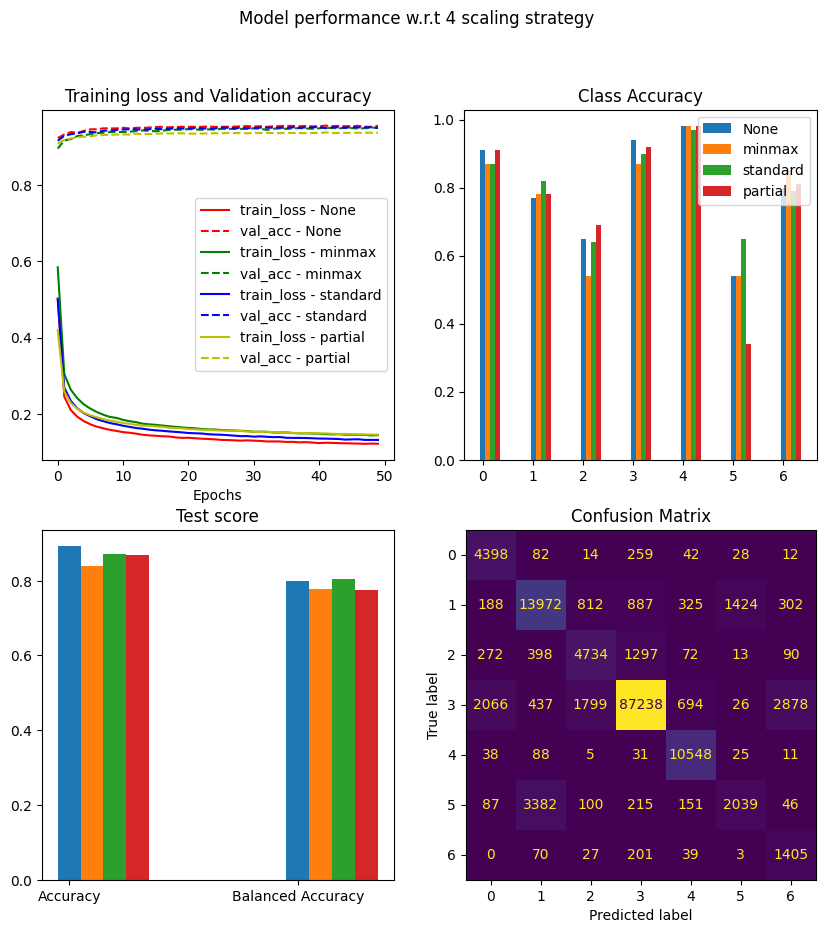

In [47]:
plot_test_result(MLP_scale_trainloss, MLP_scale_validationacc, MLP_scale_classaccuracy, MLP_scale_testscore, MLP_scale_testcf)

Text(0.5, 1.0, '8hr_0zt_2022-10-01-ch8 prediction result')

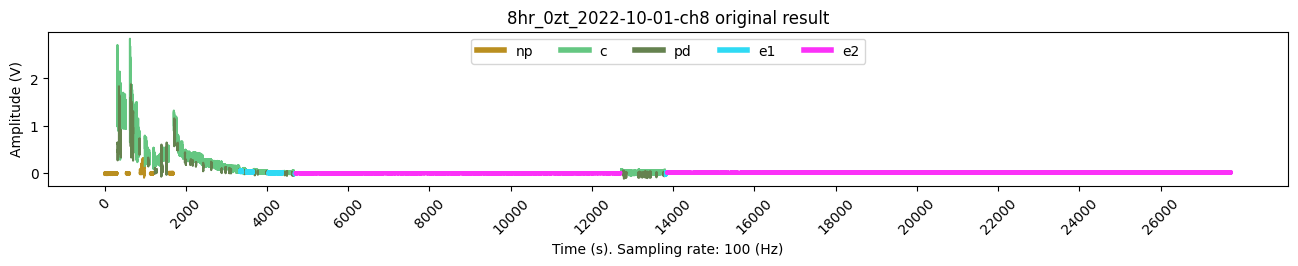

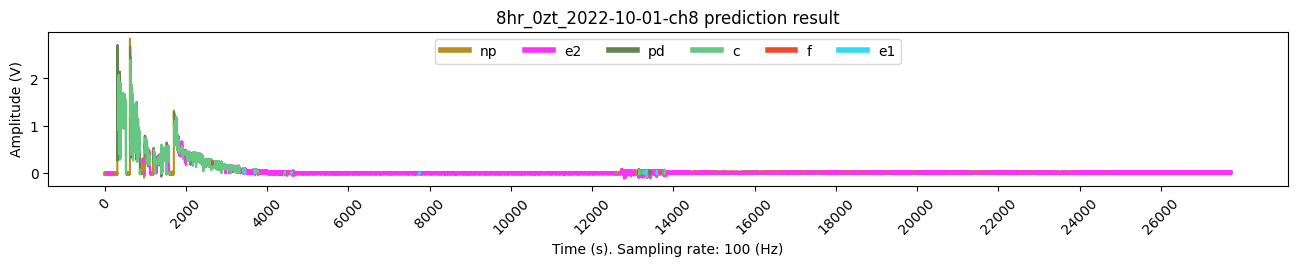

In [51]:
wave_array = data_test[filename_test[0]][0]
ana = data_test[filename_test[0]][1]
m = MLP_scale_model_save[None]
pred_ana = predict_and_save_result(wave_array,m)
pred_ana['time'] = pred_ana['time'].apply(lambda x: x*100).astype(int)
pred_ana.to_csv(f'predicted_ana_{filename_test[0]}.ANA',sep = '\t',header = None,index=None)
visualization.visualize_wave(wave_array,ana)
plt.title(f'{filename_test[0]} original result')
visualization.visualize_wave(wave_array,pred_ana)
plt.title(f'{filename_test[0]} prediction result')

Text(0.5, 1.0, '8hr_0zt_10-19-2022-ch8 prediction result')

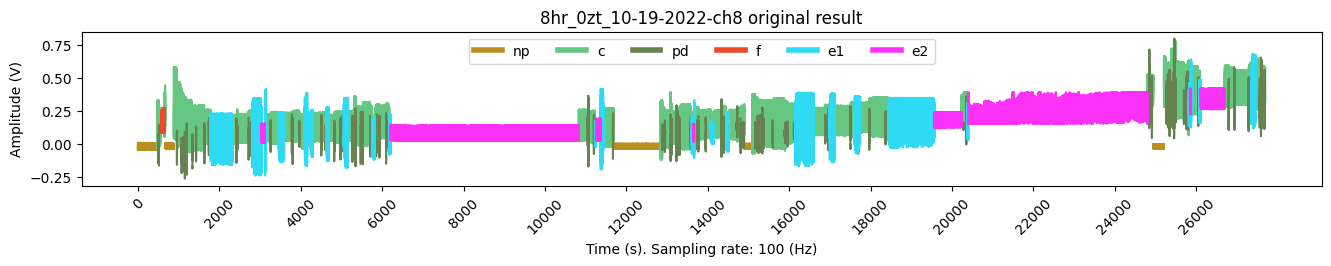

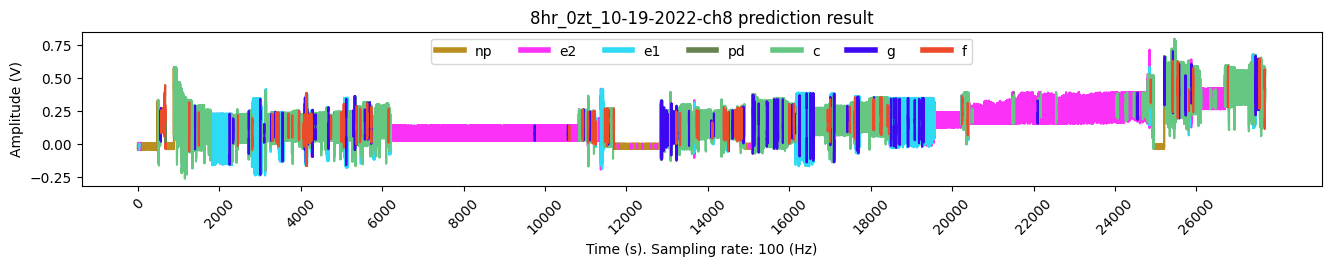

In [52]:
wave_array = data_test[filename_test[1]][0]
ana = data_test[filename_test[1]][1]
m = MLP_scale_model_save[None]
pred_ana = predict_and_save_result(wave_array,m)
pred_ana['time'] = pred_ana['time'].apply(lambda x: x*100).astype(int)
pred_ana.to_csv(f'predicted_ana_{filename_test[1]}.ANA',sep = '\t',header = None,index=None)
visualization.visualize_wave(wave_array,ana)
plt.title(f'{filename_test[1]} original result')
visualization.visualize_wave(wave_array,pred_ana)
plt.title(f'{filename_test[1]} prediction result')

Text(0.5, 1.0, '8h_0zt_2023_2_5-ch8 prediction result')

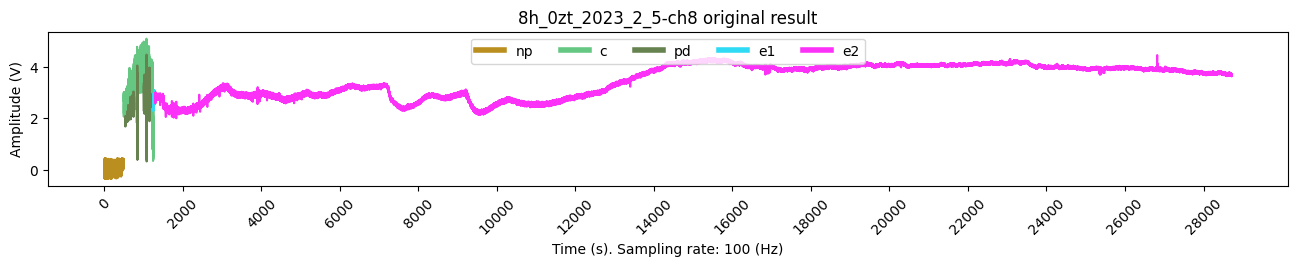

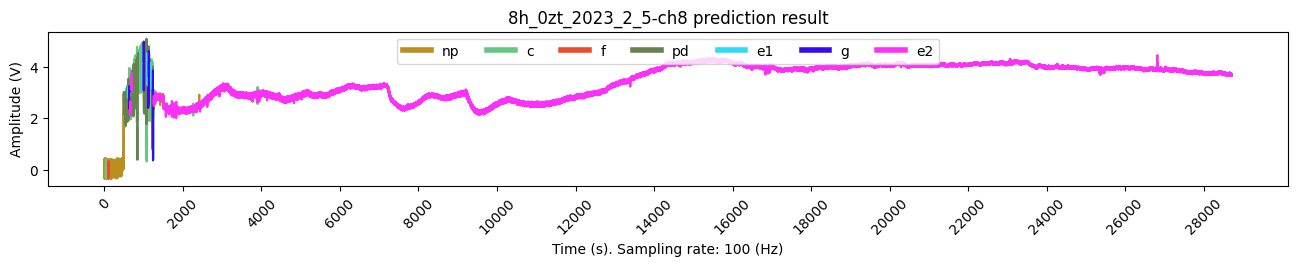

In [53]:
wave_array = data_test[filename_test[2]][0]
ana = data_test[filename_test[2]][1]
m = MLP_scale_model_save[None]
pred_ana = predict_and_save_result(wave_array,m)
pred_ana['time'] = pred_ana['time'].apply(lambda x: x*100).astype(int)
pred_ana.to_csv(f'predicted_ana_{filename_test[2]}.ANA',sep = '\t',header = None,index=None)
visualization.visualize_wave(wave_array,ana)
plt.title(f'{filename_test[2]} original result')
visualization.visualize_wave(wave_array,pred_ana)
plt.title(f'{filename_test[2]} prediction result')

Text(0.5, 1.0, '8h_0zt_2023_2_6-ch8 prediction result')

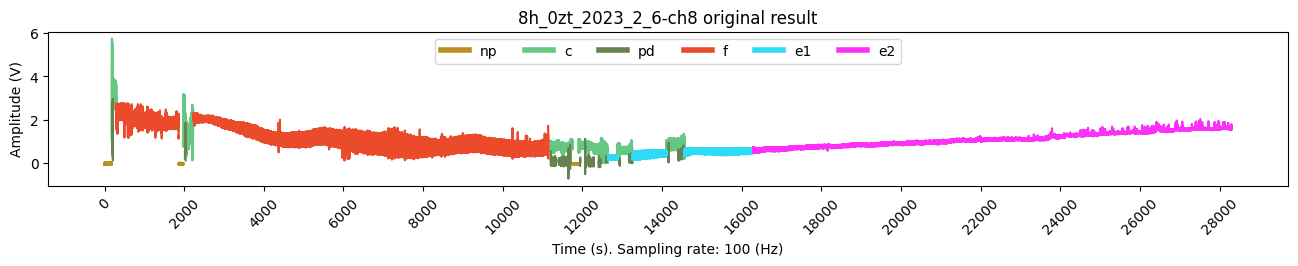

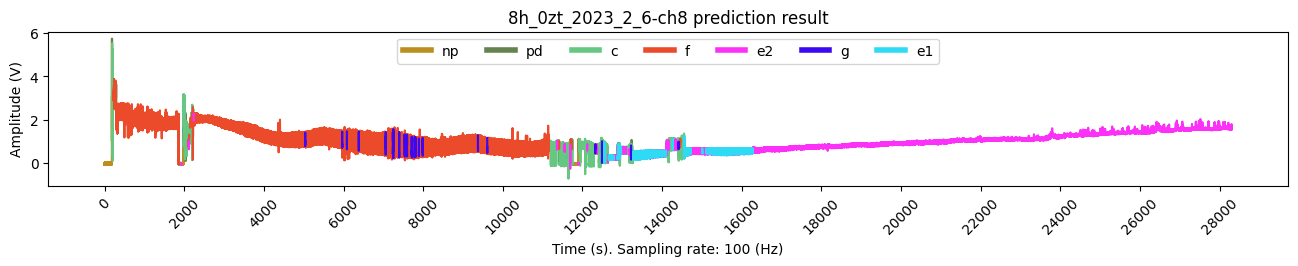

In [54]:
wave_array = data_test[filename_test[3]][0]
ana = data_test[filename_test[3]][1]
m = MLP_scale_model_save[None]
pred_ana = predict_and_save_result(wave_array,m)
pred_ana['time'] = pred_ana['time'].apply(lambda x: x*100).astype(int)
pred_ana.to_csv(f'predicted_ana_{filename_test[3]}.ANA',sep = '\t',header = None,index=None)
visualization.visualize_wave(wave_array,ana)
plt.title(f'{filename_test[3]} original result')
visualization.visualize_wave(wave_array,pred_ana)
plt.title(f'{filename_test[3]} prediction result')

Text(0.5, 1.0, '8h_16zt_2023_2_10-ch4 prediction result')

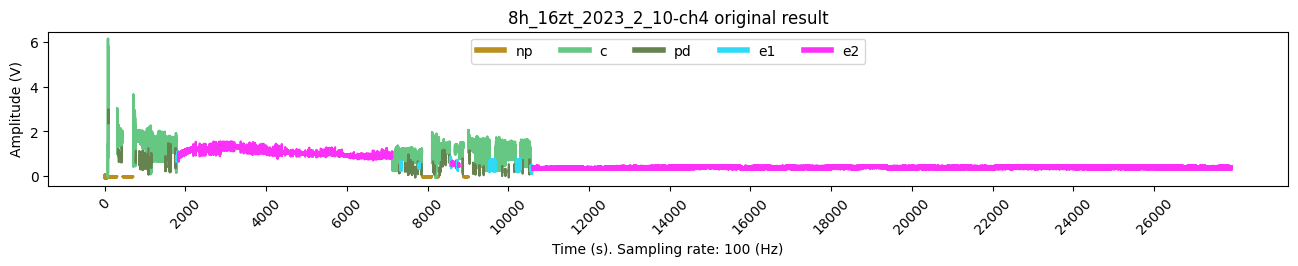

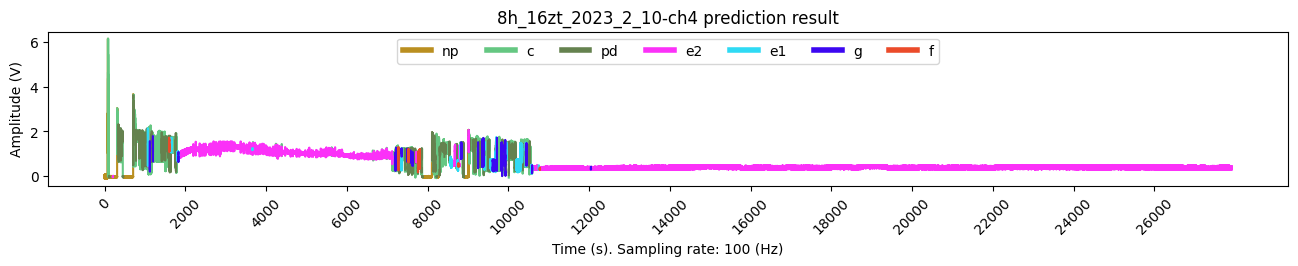

In [55]:
wave_array = data_test[filename_test[4]][0]
ana = data_test[filename_test[4]][1]
m = MLP_scale_model_save[None]
pred_ana = predict_and_save_result(wave_array,m)
pred_ana['time'] = pred_ana['time'].apply(lambda x: x*100).astype(int)
visualization.visualize_wave(wave_array,ana)
plt.title(f'{filename_test[9]} original result')
visualization.visualize_wave(wave_array,pred_ana)
plt.title(f'{filename_test[9]} prediction result')